# Demonstration

The goal of this notebook is to show some visuals made possible by Tableau on different datasets. Each data sets will be quickly explored and then the visuals will be provided. The data sets are downloaded from [SuperDataScientist website](https://www.superdatascience.com/tableau/).

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Story 1: How are sales rep doing?

This is a very simple data set consisting of 42 rows and 6 columns. It consists of the data for sales of different sales rep. Our goal is to select the best sales reps in each region.

In [8]:
reps = pd.read_csv('data/OfficeSupplies.csv')

In [7]:
reps.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95


In [12]:
regions = reps.Region.unique()
region_name = ", ".join(regions)
print("There are {} regions in the data set:".format(len(regions)))
print(region_name)

There are 3 regions in the data set:
East, Central, West


> Let's see sumamry statistics for how each rep is doing in each region based on their abour of sales. We first need to add a new column that has the sales value.

In [37]:
reps['Sales'] = round(reps['Units'] * reps['Unit Price'] / 1000,1)
rep_sales = reps[['Region','Rep','Sales']].groupby(['Region','Rep'])['Sales'].sum()
rep_sales_sorted = rep_sales.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))
rep_sales_sorted

Region   Rep    
Central  Matthew    3.1
         Alex       2.8
         Bill       1.7
         Smith      1.6
         Morgan     1.4
         Rachel     0.3
East     Susan      3.1
         Richard    2.4
         Nick       0.6
West     James      1.3
         Thomas     1.2
Name: Sales, dtype: float64

> Now that we performed groupby within groups, let's visually see the results in Tableau. We only need to develope a calculated field, and calculate the total sales. Then we use ``Region`` and ``Rep`` as columns, and ``Total_sales`` as the row. Please scroll to the right to see the whole view.

Following is a snapshot of Tableau worksheet. This Tableau file can be accessed [here](https://us-east-1.online.tableau.com/t/amnghd/views/Rep_ranking/BestSalesRep?iframeSizedToWindow=true&:embed=y&:showAppBanner=false&:display_count=no&:showVizHome=no).

<img src="Images/reps.png">

# Story 2: Unemployment Statistics

This data consists of unemployment counts for year 2005 to 2015 for different demographics in the US. Let's take a look at the data. We are interested in seeing how the unemployment has changed over time.

In [86]:
unemployment = pd.read_excel('data/Long-Term-Unemployment-Statistics.xlsx')
unemployment['Age'] = unemployment['Age'].apply(lambda x: x.split(' y')[0]) # taking "years" out of the columns
unemployment['Period'] = pd.to_datetime(unemployment['Period'], format="Y-M-D") # converting data to datetime
unemployment.set_index('Period', inplace=True)
unemp_pivot = unemployment.pivot_table(index='Period',columns='Age', values='Unemployed',aggfunc='sum')

Text(0,0.5,'Unemplyment')

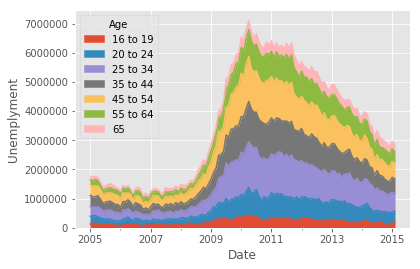

In [94]:
unemp_pivot.plot.area()
plt.xlabel('Date')
plt.ylabel('Unemplyment')

We can approach to a similar plot in Tablea, with more details and better representation. Following is a snapshot of Tableau worksheet. This Tableau file can be accessed [here](https://us-east-1.online.tableau.com/t/amnghd/views/Unemployed/Unemployed?iframeSizedToWindow=true&:embed=y&:showAppBanner=false&:display_count=no&:showVizHome=no).

<img src="Images/unemployment.png">

> We get to a similar result. However, if you refer to the link, Tableau allows us to easily filter for Gender, easily using a dropdown botton. Also annotation is much more intunitive using Tableau.

In [100]:
%%HTML
<script type='text/javascript' src='https://us-east-1.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1920px; height: 815px;'><object class='tableauViz' width='700' height='500' style='display:none;'><param name='host_url' value='https%3A%2F%2Fus-east-1.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;amnghd' /><param name='name' value='Unemployed&#47;Unemployed' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=false' /></object></div>

# Story 3: